<a href="https://colab.research.google.com/github/Santander-alt/2pPW1-Marcelo/blob/main/1rafinalIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import zipfile
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
urllib.request.urlretrieve(url, "smsspamcollection.zip")
with zipfile.ZipFile("smsspamcollection.zip", 'r') as zip_ref:
    zip_ref.extractall()

messages = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=["label", "message"])

In [4]:
print("Cantidad de mensajes por categoría:")
print(messages.label.value_counts())

messages['label_num'] = messages.label.map({'ham': 0, 'spam': 1})

Cantidad de mensajes por categoría:
label
ham     4825
spam     747
Name: count, dtype: int64


In [5]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(messages['message'])
y = messages['label_num']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [8]:
y_pred = model.predict(X_test)
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[1193   14]
 [   9  177]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1207
           1       0.93      0.95      0.94       186

    accuracy                           0.98      1393
   macro avg       0.96      0.97      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [1]:
nuevos_mensajes = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim.",
    " Hola, ¿vamos a almorzar mañana? no teno cash",
    "URGENT! Your mobile number has been awarded a $2000 prize. Call now!"
]

X_nuevos = vectorizer.transform(nuevos_mensajes)
predicciones = model.predict(X_nuevos)

print("\nPredicciones para nuevos mensajes:")
for msg, pred in zip(nuevos_mensajes, predicciones):
    etiqueta = "Spam" if pred == 1 else "Ham"
    print(f"\nMensaje: {msg}\nClasificación: {etiqueta}")

resultado_df = pd.DataFrame({
    'Mensaje': nuevos_mensajes,
    'Predicción': ["Spam" if p == 1 else "Ham" for p in predicciones]
})
print("\nResultados de las predicciones en forma de tabla:")
print(resultado_df)

NameError: name 'vectorizer' is not defined

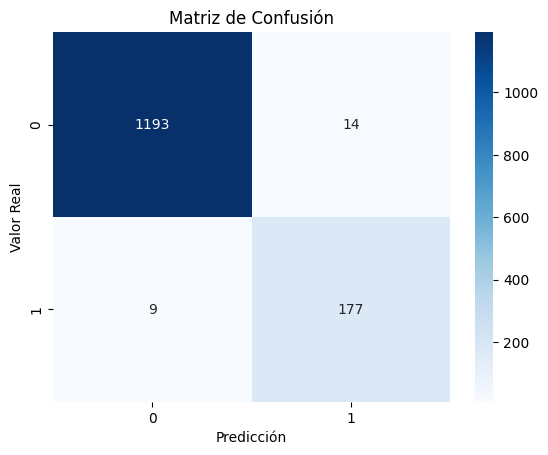

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
